<a href="https://colab.research.google.com/github/fznnfitrah/Natural-Language-Processing-B-2026/blob/main/TUGAS2_PROJECT_SEDERHANA_NLP_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi

In [ ]:
# Pustaka untuk Stemming Bahasa Indonesia
import nltk
import re
import string
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Download resource NLTK yang diperlukan
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# --- NOMOR 2: Membuat Variable ---
# a. Doc1 (Cerita kuliah > 75 kata)
doc1_19_001 = (
    "Nama saya Fauzan, saat ini saya sedang menempuh studi di Universitas Trunojoyo Madura pada jurusan Teknik Informatika. "
    "Selama menjalani masa kuliah, salah satu pengalaman yang paling berkesan bagi saya adalah saat menjalani program magang Kerja Praktek di lingkungan kampus. "
    "Di sana, saya mendapatkan kepercayaan untuk mengembangkan sistem informasi nyata, salah satunya adalah SILAP MONEV (Sistem Laporan Monitoring dan Evaluasi). "

    "Mata kuliah yang paling saya sukai adalah yang berkaitan dengan pengembangan perangkat lunak dan sistem informasi."
    "Alasan utamanya adalah karena saya bisa langsung mempraktikkan teori yang dipelajari, mulai dari menyusun dokumen analisis kebutuhan hingga mengelola repository kode menggunakan Git. "
    "Bagi saya, Informatika bukan sekadar barisan kode, melainkan sarana untuk membangun solusi yang bermanfaat bagi institusi dan masyarakat. "
)

# b. Doc2 (Berita online terbaru > 75 kata)
doc2_19_001 = (
    "Menteri Keuangan Purbaya Yudhi Sadewa memastikan suami dari alumnus beasiswa Lembaga Pengelola Dana Pendidikan berinisial DS akan mengembalikan seluruh dana beasiswanya kepada negara. "
    "Ini adalah buntut dari unggahan DS soal kewarganegaraan anaknya yang dianggap merendahkan martabat Indonesia memicu polemik di media sosial. "

    "Kepastian itu disampaikan Purbaya setelah Pelaksana Tugas Direktur Utama Lembaga Pengelola Dana Pendidikan (LPDP) Sudarto berkomunikasi dengan yang bersangkutan. "
    "Suami DS, yang juga penerima beasiswa LPDP, disebut telah menyatakan kesediaannya untuk mengembalikan dana tersebut. "
)

# c. Menggabung variabel
doc3_19_001 = doc1_19_001 + " " + doc2_19_001

# d. Tampilkan hasil
print("=== HASIL NOMOR 2 (Isi Variabel) ===")
print(f"Doc1: {doc1_19_001[:50]}...")
print(f"Doc2: {doc2_19_001[:50]}...")
print(f"Doc3: {doc3_19_001[:50]}...\n")

=== HASIL NOMOR 2 (Isi Variabel) ===
Doc1: Nama saya Fauzan, saat ini saya sedang menempuh st...
Doc2: Menteri Keuangan Purbaya Yudhi Sadewa memastikan s...
Doc3: Nama saya Fauzan, saat ini saya sedang menempuh st...



In [ ]:
# --- NOMOR 3: Tokenisasi Kalimat ---
sentence_tokens = sent_tokenize(doc3_19_001)
print("=== HASIL NOMOR 3 (Tokenisasi Kalimat) ===")
for i, sent in enumerate(sentence_tokens):
    print(f"{i+1}. {sent}")
print("\n")

=== HASIL NOMOR 3 (Tokenisasi Kalimat) ===
1. Nama saya Fauzan, saat ini saya sedang menempuh studi di Universitas Trunojoyo Madura pada jurusan Teknik Informatika.
2. Selama menjalani masa kuliah, salah satu pengalaman yang paling berkesan bagi saya adalah saat menjalani program magang Kerja Praktek di lingkungan kampus.
3. Di sana, saya mendapatkan kepercayaan untuk mengembangkan sistem informasi nyata, salah satunya adalah SILAP MONEV (Sistem Laporan Monitoring dan Evaluasi).
4. Mata kuliah yang paling saya sukai adalah yang berkaitan dengan pengembangan perangkat lunak dan sistem informasi.Alasan utamanya adalah karena saya bisa langsung mempraktikkan teori yang dipelajari, mulai dari menyusun dokumen analisis kebutuhan hingga mengelola repository kode menggunakan Git.
5. Bagi saya, Informatika bukan sekadar barisan kode, melainkan sarana untuk membangun solusi yang bermanfaat bagi institusi dan masyarakat.
6. Menteri Keuangan Purbaya Yudhi Sadewa memastikan suami dari alumnus beas

In [ ]:
# --- NOMOR 4: Menghapus Angka, Tanda Baca, dan Stopwords ---
def clean_text(text):
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenisasi kata & Lowercase
    words = word_tokenize(text.lower())
    # Hapus Stopwords
    stop_words = set(stopwords.words('indonesian'))
    cleaned_words = [w for w in words if w not in stop_words]
    return cleaned_words

cleaned_doc3 = clean_text(doc3_19_001)
print("=== HASIL NOMOR 4 (Pembersihan Teks) ===")
print(cleaned_doc3[:20], "... (dst)\n")

=== HASIL NOMOR 4 (Pembersihan Teks) ===
['nama', 'fauzan', 'menempuh', 'studi', 'universitas', 'trunojoyo', 'madura', 'jurusan', 'teknik', 'informatika', 'menjalani', 'kuliah', 'salah', 'pengalaman', 'berkesan', 'menjalani', 'program', 'magang', 'kerja', 'praktek'] ... (dst)



In [ ]:
# --- NOMOR 5: Frekuensi Kata & Visualisasi ---
# a. Menghitung frekuensi
freq_dist = nltk.FreqDist(cleaned_doc3)

# c. Tampilkan hasil frekuensi
print("=== HASIL NOMOR 5 (Frekuensi Kata) ===")
print(freq_dist.most_common(10))

=== HASIL NOMOR 5 (Frekuensi Kata) ===
[('dana', 4), ('sistem', 3), ('ds', 3), ('informatika', 2), ('menjalani', 2), ('kuliah', 2), ('salah', 2), ('kode', 2), ('purbaya', 2), ('suami', 2)]


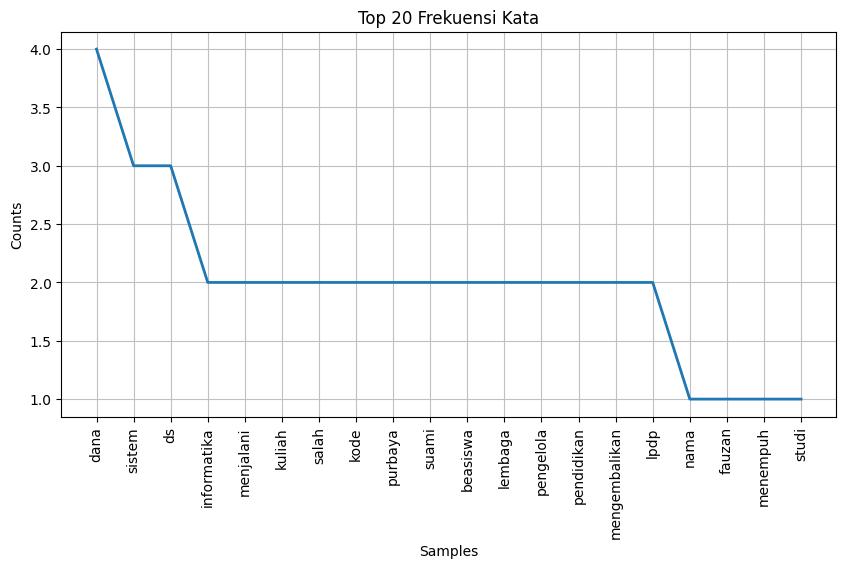

In [ ]:
# b. Menggambarkan frekuensi (Matplotlib)
plt.figure(figsize=(10, 5))
freq_dist.plot(20, cumulative=False, title="Top 20 Frekuensi Kata")
plt.show()

In [ ]:
# --- NOMOR 6: Stemming ---
# Inisialisasi Stemmer Factory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Proses Stemming pada Doc3
hasil_stemming = stemmer.stem(doc3_19_001)

# Menampilkan Hasilnya
print("=== HASIL NOMOR 6 (Stemming Bahasa Indonesia) ===")
print(hasil_stemming)

=== HASIL NOMOR 6 (Stemming Bahasa Indonesia) ===
nama saya fauzan saat ini saya sedang tempuh studi di universitas trunojoyo madura pada jurus teknik informatika lama jalan masa kuliah salah satu alam yang paling kesan bagi saya adalah saat jalan program magang kerja praktek di lingkung kampus di sana saya dapat percaya untuk kembang sistem informasi nyata salah satu adalah silap monev sistem lapor monitoring dan evaluasi mata kuliah yang paling saya suka adalah yang kait dengan kembang perangkat lunak dan sistem informasi alas utama adalah karena saya bisa langsung praktik teori yang ajar mulai dari susun dokumen analisis butuh hingga kelola repository kode guna git bagi saya informatika bukan sekadar baris kode lain sarana untuk bangun solusi yang manfaat bagi institusi dan masyarakat menteri uang purbaya yudhi sadewa pasti suami dari alumnus beasiswa lembaga kelola dana didik inisial ds akan kembali seluruh dana beasiswa kepada negara ini adalah buntut dari unggah ds soal kewargane